In [25]:
import sys
import os


import pandas as pd
import matplotlib.pyplot as plt


# Prevent scientific notation in pandas output.
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Add the parent directory to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


from database import Database
from model.ticker import Ticker


DB_PATH = "sqlite:///../finance.db"


db = Database(database_url=DB_PATH)

In [26]:
year = 2010
year_2010 = f"SELECT * FROM sma WHERE strftime('%Y', sma.date) = '{year}'"

In [27]:
year = 2000
year_2000 = f"SELECT * FROM sma WHERE strftime('%Y', sma.date) = '{year}'"

In [28]:
year = 2020
year_2020 = f"SELECT * FROM sma WHERE strftime('%Y', sma.date) = '{year}'"

In [29]:
df_2010 = pd.read_sql(year_2010, db.engine)
df_2010['date'] = pd.to_datetime(df_2010['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [30]:
df_2000 = pd.read_sql(year_2000, db.engine)
df_2000['date'] = pd.to_datetime(df_2000['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [31]:
df_2020 = pd.read_sql(year_2020, db.engine)
df_2020['date'] = pd.to_datetime(df_2020['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [32]:
symbol = 'HPAR-fake'

hpar_2000 = df_2000[df_2000['symbol'] == symbol]
hpar_2010 = df_2010[df_2010['symbol'] == symbol]
hpar_2020 = df_2020[df_2020['symbol'] == symbol]

In [33]:
hpar_2000

id       date     symbol  sma_5  sma_10  sma_20  sma_50  sma_100  \
0      1 2000-01-03  HPAR-fake    NaN     NaN     NaN     NaN      NaN   
1      2 2000-01-04  HPAR-fake    NaN     NaN     NaN     NaN      NaN   
2      3 2000-01-05  HPAR-fake    NaN     NaN     NaN     NaN      NaN   
3      4 2000-01-06  HPAR-fake    NaN     NaN     NaN     NaN      NaN   
4      5 2000-01-07  HPAR-fake 99.581     NaN     NaN     NaN      NaN   
..   ...        ...        ...    ...     ...     ...     ...      ...   
255  256 2000-12-25  HPAR-fake 59.474  59.585  60.467  63.515   67.022   
256  257 2000-12-26  HPAR-fake 59.345  59.454  60.366  63.277   66.897   
257  258 2000-12-27  HPAR-fake 59.264  59.338  60.278  63.063   66.769   
258  259 2000-12-28  HPAR-fake 59.412  59.436  60.205  62.887   66.644   
259  260 2000-12-29  HPAR-fake 59.502  59.465  60.078  62.721   66.512   

     sma_200  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
255   73.605  
256   73.417  
257   73.238  
258   73.064  
259   72.893  

[260 rows x 9 columns]

In [34]:
hpar_2010

id       date     symbol  sma_5  sma_10  sma_20  sma_50  sma_100  \
0    2610 2010-01-01  HPAR-fake 51.884  52.313  52.161  53.432   51.925   
1    2611 2010-01-04  HPAR-fake 51.872  52.260  52.077  53.417   51.946   
2    2612 2010-01-05  HPAR-fake 51.959  52.312  52.072  53.405   51.973   
3    2613 2010-01-06  HPAR-fake 52.078  52.271  52.069  53.409   52.005   
4    2614 2010-01-07  HPAR-fake 52.306  52.229  52.119  53.403   52.030   
..    ...        ...        ...    ...     ...     ...     ...      ...   
256  2866 2010-12-27  HPAR-fake 49.988  50.002  48.291  46.279   45.890   
257  2867 2010-12-28  HPAR-fake 49.941  50.039  48.499  46.411   45.926   
258  2868 2010-12-29  HPAR-fake 49.998  50.082  48.723  46.551   45.963   
259  2869 2010-12-30  HPAR-fake 50.082  50.165  48.949  46.695   46.005   
260  2870 2010-12-31  HPAR-fake 50.299  50.207  49.212  46.852   46.059   

     sma_200  
0     53.475  
1     53.449  
2     53.428  
3     53.407  
4     53.391  
..       ...  
256   47.166  
257   47.165  
258   47.166  
259   47.170  
260   47.180  

[261 rows x 9 columns]

In [35]:
hpar_2020

id       date     symbol  sma_5  sma_10  sma_20  sma_50  sma_100  \
0    5218 2020-01-01  HPAR-fake 51.882  52.465  52.040  50.035   50.018   
1    5219 2020-01-02  HPAR-fake 51.558  52.415  52.081  50.111   50.063   
2    5220 2020-01-03  HPAR-fake 51.527  52.330  52.115  50.209   50.117   
3    5221 2020-01-06  HPAR-fake 51.618  52.193  52.117  50.298   50.171   
4    5222 2020-01-07  HPAR-fake 51.828  52.109  52.120  50.398   50.237   
..    ...        ...        ...    ...     ...     ...     ...      ...   
257  5475 2020-12-25  HPAR-fake 63.722  62.907  64.027  65.468   62.996   
258  5476 2020-12-28  HPAR-fake 64.075  62.987  63.950  65.420   63.055   
259  5477 2020-12-29  HPAR-fake 64.307  63.241  63.903  65.383   63.123   
260  5478 2020-12-30  HPAR-fake 64.618  63.615  63.860  65.360   63.187   
261  5479 2020-12-31  HPAR-fake 64.922  64.063  63.843  65.348   63.255   

     sma_200  
0     51.250  
1     51.197  
2     51.147  
3     51.102  
4     51.065  
..       ...  
257   61.716  
258   61.731  
259   61.752  
260   61.767  
261   61.776  

[262 rows x 9 columns]

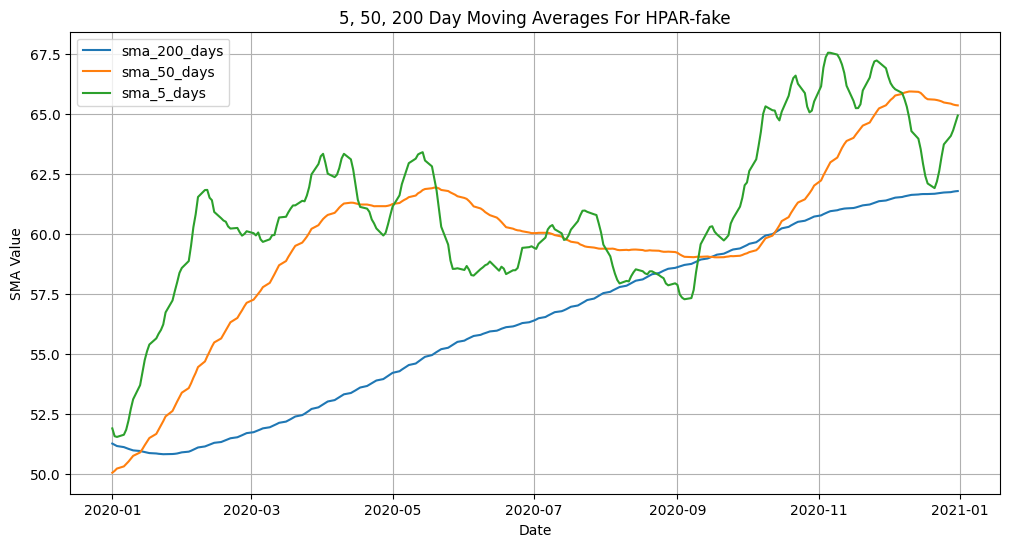

In [55]:
# Plot the SMAs
plt.figure(figsize=(12, 6))

plt.plot(hpar_2020.index, hpar_2020['sma_200'], label="sma_200_days")
plt.plot(hpar_2020.index, hpar_2020['sma_50'], label="sma_50_days")
plt.plot(hpar_2020.index, hpar_2020['sma_5'], label="sma_5_days")

plt.xlabel('Date')
plt.ylabel('SMA Value')
plt.title(f'5, 50, 200 Day Moving Averages For {symbol}')
plt.legend()
plt.grid(True)
plt.show()